In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

## add noise

In [4]:
noise = np.random.randn(len(x_data))

y = mx + b
b = 5

In [5]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [9]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [10]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [11]:
y_df.head()

,Y
0,5.846133
1,5.206437
2,5.158859
3,4.403195
4,3.641756


In [14]:
my_data = pd.concat([x_df,y_df],axis=1)

In [15]:
my_data.head()

,X Data,Y
0,0.00000,5.846133
1,0.00001,5.206437
2,0.00002,5.158859
3,0.00003,4.403195
4,0.00004,3.641756


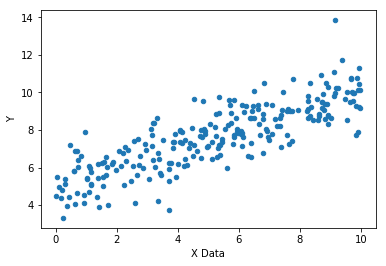

In [16]:
#samples only 250 because a lot of data
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [18]:
# create batch
batch_size = 8

In [21]:
#random number
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [22]:
xph = tf.placeholder(tf.float32,[batch_size])

In [23]:
yph = tf.placeholder(tf.float32,[batch_size])

In [24]:
y_model = m*xph + b

In [26]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 100000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m,model_b = sess.run([m,b])

In [35]:
model_m

0.49284604

In [36]:
model_b

4.9769449

In [37]:
y_hat = x_data * model_m + model_b

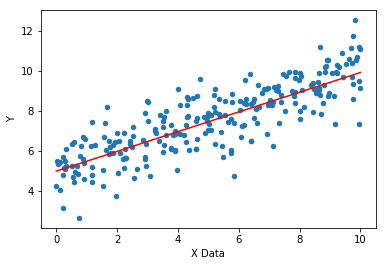

In [39]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## USING TF ESTIMATOR

In [41]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ]

In [43]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpn4sohkwe', '_service': None, '_is_chief': True, '_task_id': 0, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4b3e617780>, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_num_ps_replicas': 0, '_session_config': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_num_worker_replicas': 1}


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_eval, y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [47]:
print(x_train.shape)

(700000,)


In [48]:
x_eval.shape

(300000,)

In [49]:
# x = name of feature_column.numer_column
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [50]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [51]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [52]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpn4sohkwe/model.ckpt.
INFO:tensorflow:loss = 322.604, step = 1
INFO:tensorflow:global_step/sec: 1376.91
INFO:tensorflow:loss = 18.2822, step = 101 (0.073 sec)
INFO:tensorflow:global_step/sec: 1237.02
INFO:tensorflow:loss = 9.80936, step = 201 (0.081 sec)
INFO:tensorflow:global_step/sec: 1424.9
INFO:tensorflow:loss = 18.8997, step = 301 (0.070 sec)
INFO:tensorflow:global_step/sec: 1390.36
INFO:tensorflow:loss = 39.6999, step = 401 (0.073 sec)
INFO:tensorflow:global_step/sec: 1094.95
INFO:tensorflow:loss = 10.9055, step = 501 (0.091 sec)
INFO:tensorflow:global_step/sec: 1257.68
INFO:tensorflow:loss = 9.59133, step = 601 (0.080 sec)
INFO:tensorflow:global_step/sec: 1067.25
INFO:tensorflow:loss = 9.11594, step = 701 (0.094 sec)
INFO:tensorflow:global_step/sec: 1056.99
INFO:tensorflow:loss = 18.031, step = 801 (0.094 sec)
INFO:tensorflow:global_step/sec: 1207.84
INFO:tensorflow:loss = 9.60285, s

In [53]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-01-11-22:50:41
INFO:tensorflow:Restoring parameters from /tmp/tmpn4sohkwe/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

In [54]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-01-11-22:51:49
INFO:tensorflow:Restoring parameters from /tmp/tmpn4sohkwe/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

In [55]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'loss': 8.4166441, 'global_step': 1000, 'average_loss': 1.0520805}


In [56]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'loss': 8.606739, 'global_step': 1000, 'average_loss': 1.0758424}


In [58]:
#predict
brand_new_data = np.linspace(0,10,10)

In [59]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [61]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /tmp/tmpn4sohkwe/model.ckpt-1000


[{'predictions': array([ 4.48060417], dtype=float32)},
 {'predictions': array([ 5.13726044], dtype=float32)},
 {'predictions': array([ 5.7939167], dtype=float32)},
 {'predictions': array([ 6.45057249], dtype=float32)},
 {'predictions': array([ 7.10722923], dtype=float32)},
 {'predictions': array([ 7.76388454], dtype=float32)},
 {'predictions': array([ 8.42054081], dtype=float32)},
 {'predictions': array([ 9.07719707], dtype=float32)},
 {'predictions': array([ 9.73385429], dtype=float32)},
 {'predictions': array([ 10.39050961], dtype=float32)}]

In [62]:
predctions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predctions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /tmp/tmpn4sohkwe/model.ckpt-1000


In [63]:
predctions

[array([ 4.48060417], dtype=float32),
 array([ 5.13726044], dtype=float32),
 array([ 5.7939167], dtype=float32),
 array([ 6.45057249], dtype=float32),
 array([ 7.10722923], dtype=float32),
 array([ 7.76388454], dtype=float32),
 array([ 8.42054081], dtype=float32),
 array([ 9.07719707], dtype=float32),
 array([ 9.73385429], dtype=float32),
 array([ 10.39050961], dtype=float32)]

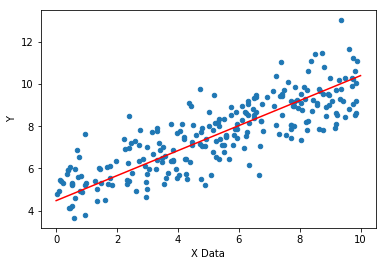

In [64]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predctions,'r')